#Welcome to BEHAV3D:
##Run all the following cells to run the "Backprojection T cell" analysis

In [1]:
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314932 sha256=9ef336d5e25abc53abfb9e51f7c6752d7f3fa33fb1c240696b1122f1e24ce458
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [2]:
%load_ext rpy2.ipython

# What type of files does BEHAV3D accept?
- You need to upload as many files ending with "_Statistics" with the unique ID or name as number of datasets you want to compare.
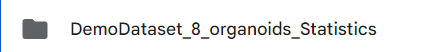
- Inside each folder uploaded you at least need to have the following statistics in a ".csv" format as shown in the following image:
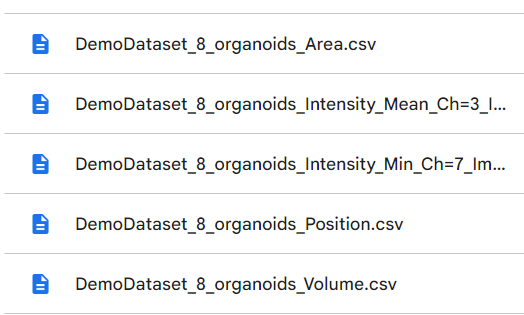

#1) Uploading Files
#**¡IMPORTANT!**
#**Where are your files?:**

####PD: Do either "A" or "B", not both.

#####A) FILES ARE IN MY LOCAL COMPUTER: Load the files to Google Colab directly using the Google Colab feature in the image shown below.
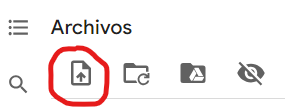



#####B) FILES ARE ON GOOGLE DRIVE: Grant access to the Drive by clicking on the cell bellow.
#####Google Drive Accession:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2) Importing Packages and Libraries

In [4]:
%%R
install.packages('yaml')
install.packages('dplyr')

library(yaml)
library(dplyr)

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp31oous/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp31oous/downloaded_packages’

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




#3) Importing paths
####The following cells must be filled in prior to running the rest of the code:
####-"Data_dir" is the path where you have your data
####-"Output_dir" is the path where you want the output to be stored
####-"Metadata_dir" is the path of the ".tsv" file where the metadata is
####-"folder_name" is the name of the file with all the results at the end of the script

In [6]:
%%R
Data_dir <- "/content/drive/MyDrive/BEHAV3D-main/demos/tcell_demo/data" #@param {type:"string"}
Output_dir <- "/content/drive/MyDrive/BEHAV3D-main/demos/tcell_demo/example_output" #@param {type:"string"}
Metadata_dir <- "/content/drive/MyDrive/BEHAV3D-main/demos/tcell_demo/BEHAV3D_metadata.tsv" #@param {type:"string"}
folder_name <- "My_folder" #@param {type:"string"}


#4) Run Backprojection

In [ ]:
%%R
output_dir<-Output_dir
output_dir=paste0(output_dir,"/tcell_behavior/results/")

#import metadata
metadata=read.csv(Metadata_dir, sep="\t", check.names=FALSE)

## read master dataset that contains both TrackID and TrackID2
master<-readRDS(paste0(output_dir,"raw_tcell_track_data.rds"))
classified_tracks<-readRDS(paste0(output_dir,"classified_tcell_track_data_summary.rds"))
### keep only the TrackID2 that were classified
master2 <-master%>%filter(TrackID %in% classified_tracks$TrackID )
clustertype<-classified_tracks[,c("TrackID", "cluster2")]
clustertype<- clustertype[!duplicated(clustertype$TrackID),]
master3 <- left_join(master2 ,clustertype, by=c("TrackID"))

for(to_backproject in unique(master3$basename)){
  To_export<-subset(master3,basename==to_backproject)
  To_export<-To_export[!duplicated(To_export$Original_TrackID),c("Original_TrackID","cluster2")]
  To_export_list<-split(To_export,To_export$cluster2)
  ### Save this list that allows to identify in the imaging dataset to which cluster does each cell belong to.
  backproject_dir <- file.path("backprojection", to_backproject)
  dir.create(backproject_dir, recursive=TRUE)
  write(paste(as.character(To_export_list), sep="' '", collapse=", "), paste0(backproject_dir,"/Backproject.txt"))
}

# Set the source and destination paths
source_dir <- "/content/backprojection"  # Replace with the actual source path

# Copy the folder
file.copy(source_dir, output_dir, recursive = TRUE)

[1] TRUE


#5) If you want to download the generated files as a zip to your local computer, do the following:
###1) Run this code
###2) Right click on the generated file named "my_folder.zip" and click on download. Like in the image:
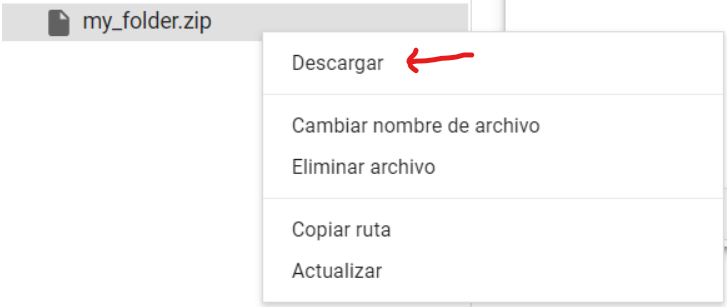

In [ ]:
%%R

#Generating the folder
dir.create(folder_name)

# Get a list of all files in the current directory
file_list <- list.files()

# Exclude files named "drive" or "sample_data"
files_to_move <- file_list[!(file_list %in% c("drive", "sample_data"))]

# Move files to the new folder
for (file in files_to_move) {
  file_path <- file
  new_path <- paste0(folder_name, "/", file)
  file.rename(file_path, new_path)
}

zip_file_path <- paste0(folder_name, ".zip")
zip(zip_file_path, files = list.files(folder_name, recursive = TRUE, full.names = TRUE))


